In [1]:
from Train_STAGATE import train_STAGATE
from utils import mclust_R, Stats_Spatial_Net, Cal_Spatial_Net
import squidpy as sq
import scanpy as sc
import numpy as np
import pandas as pd
import os
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder 

seed = 2022

/home/ubuntu/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 对squidpy中集成的10X Visium数据集进行处理

/home/ubuntu/.local/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


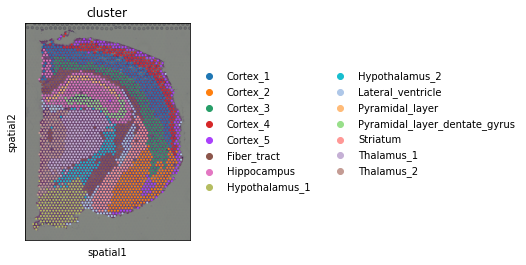

In [2]:
adata = sq.datasets.visium_hne_adata(path='../dataset/visium_hne.h5ad')
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pl.spatial(adata, color=['cluster'])

In [3]:
Cal_Spatial_Net(adata, k_cutoff=6, model='KNN') # 生成网络，保存在.uns['Spatial_Net'】中 
adata = train_STAGATE(adata, n_epochs=30, random_seed=seed)
adata.obsm['STAGATE']

------Calculating spatial graph...
The graph contains 16128 edges, 2688 cells.
6.0000 neighbors per cell on average.
Size of Input:  (2688, 3000)


100%|██████████| 30/30 [00:29<00:00,  1.01it/s]


array([[-1.2802709 ,  4.3736544 ,  1.4409361 , ..., -3.5831647 ,
         6.6038857 , -2.7084374 ],
       [-1.8657786 ,  4.832939  ,  1.3025131 , ..., -3.3967829 ,
         6.387092  , -2.7035904 ],
       [-1.7453456 ,  4.6215754 ,  0.5110738 , ..., -2.4468176 ,
         5.8183084 , -2.73908   ],
       ...,
       [-1.1013948 ,  4.525587  ,  0.41083455, ..., -2.4829512 ,
         5.68934   , -2.5610118 ],
       [-1.3770106 ,  4.2473335 ,  0.85054636, ..., -1.6273401 ,
         6.321801  , -2.4475834 ],
       [-1.8487182 ,  4.6927958 ,  1.36763   , ..., -3.1235752 ,
         6.8455577 , -2.3434486 ]], dtype=float32)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


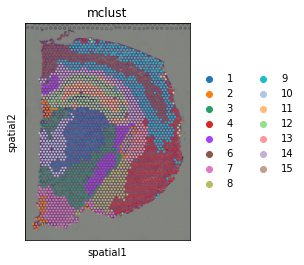

In [4]:
adata = mclust_R(adata, 15) # 对embedding进行聚类，聚类结果保存在.obs['mclust']中
sc.pl.spatial(adata, color=['mclust'])  # 绘制图

In [5]:
label = LabelEncoder().fit_transform(adata.obs['cluster'])
pred = LabelEncoder().fit_transform(adata.obs['mclust'])
metrics.adjusted_rand_score(label, pred)    # 计算预测值与真实值之间的兰德系数

0.44104217008742

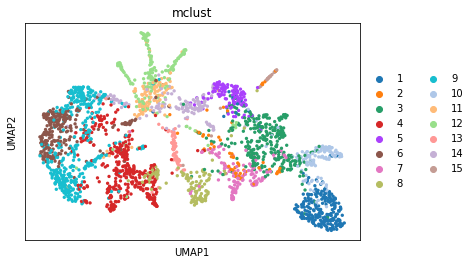

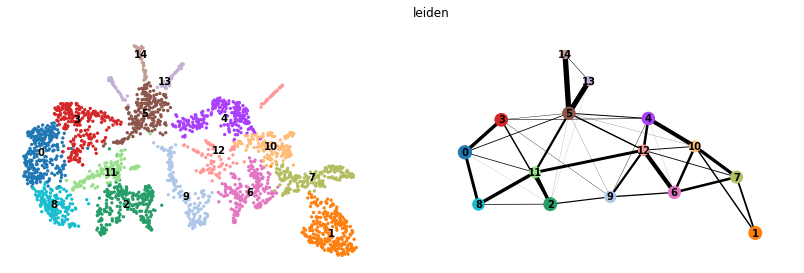

In [6]:
sc.pl.umap(adata, color=["mclust"])
sc.tl.paga(adata)
sc.pl.paga_compare(adata)

# 处理DLPFC数据

In [ ]:
id = '151507'
adata = sc.read_visium(path='../dataset/DLPFC/' + id)
adata.var_names_make_unique()

In [ ]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
# read the annotation
Ann_df = pd.read_csv(os.path.join('../dataset', 'DLPFC', '151507', 'ground_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']
sc.pl.spatial(adata, color=['Ground Truth'])

In [ ]:
Cal_Spatial_Net(adata, k_cutoff=6, model='KNN') # 生成网络，保存在.uns['Spatial_Net']中 
adata = train_STAGATE(adata, n_epochs=50, random_seed=seed)
adata.obsm['STAGATE']

In [ ]:
adata = mclust_R(adata, 7) # 对embedding进行聚类，聚类结果保存在.obs['mclust']中
sc.pl.spatial(adata, color=['mclust'])  # 绘制图

In [ ]:
label = LabelEncoder().fit_transform(adata.obs['Ground Truth'])
pred = LabelEncoder().fit_transform(adata.obs['mclust'])
metrics.adjusted_rand_score(label, pred)    # 计算预测值与真实值之间的兰德系数

In [ ]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.pl.umap(adata, color=["mclust"])
sc.tl.paga(adata, groups='mclust')
sc.pl.paga_compare(adata)

# 处理成年老鼠大脑切片数据集

In [ ]:
adata = sc.read_visium(path=os.path.join('..', 'dataset', 'Adult_Mouse_Brain_Section_1'))
adata.var_names_make_unique()

In [ ]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
Cal_Spatial_Net(adata, rad_cutoff=300)
adata = train_STAGATE(adata, n_epochs=30, random_seed=seed)
adata.obsm['STAGATE']

In [ ]:
adata = mclust_R(adata, 22) # 对embedding进行聚类，聚类结果保存在.obs['mclust']中
sc.pl.spatial(adata, color=['mclust'])  # 绘制图

In [ ]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.pl.umap(adata, color=["mclust"])
sc.tl.paga(adata, groups='mclust')
sc.pl.paga_compare(adata)

# Slide-seqV2 mouse olfactory bulb

In [ ]:
counts = pd.read_csv(os.path.join('..', 'dataset', 'Slide-seqV2_MoB', 'data', 'Puck_200127_15.digital_expression.txt'), sep='\t', index_col=0)
coor_df = pd.read_csv(os.path.join('..', 'dataset', 'Slide-seqV2_MoB', 'data', 'Puck_200127_15_bead_locations.csv'), index_col=0)

adata = sc.AnnData(counts.T)
adata.var_names_make_unique()
coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
adata.obsm["spatial"] = coor_df.to_numpy()

used_barcode = pd.read_csv(os.path.join('..', 'dataset', 'Slide-seqV2_MoB', 'used_barcodes.txt'), sep='\t', header=None)
adata = adata[used_barcode[0],]

In [ ]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [ ]:
Cal_Spatial_Net(adata, rad_cutoff=300)
adata = train_STAGATE(adata, n_epochs=30, random_seed=seed)
adata.obsm['STAGATE']

In [ ]:
adata = mclust_R(adata, 9) # 对embedding进行聚类，聚类结果保存在.obs['mclust']中
sc.pl.spatial(adata, color=['mclust'])  # 绘制图

In [ ]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
sc.pl.umap(adata, color=["mclust"])
sc.tl.paga(adata, groups='mclust')
sc.pl.paga_compare(adata)